## DINOv2 시각화(테스트용)

In [2]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests
from train_vlm import QuIC360Dataset
from transformers import AutoProcessor, AutoTokenizer

dataset = QuIC360Dataset(
    csv_file="data/quic360/downtest.csv",
    image_processor= AutoProcessor.from_pretrained("facebook/dinov2-small",cache_dir='./.cache'),
    tokenizer=AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B"),
    image_size=[512, 512],
    max_length=128,
    do_crop=True,
    fov=90,
    overlap_ratio=0.5,
)
sample = dataset[0]
model = AutoModel.from_pretrained('facebook/dinov2-small',cache_dir='./.cache')


outputs = model(sample['pixel_values'])
last_hidden_states = outputs.last_hidden_state
last_hidden_states = last_hidden_states.cpu().detach().numpy()  

/Users/seungwoo/anaconda3/envs/sur/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


image_size: (1024, 2048)
[train] img_size=(1024, 2048)  do_crop=True
Input sequence:
<|im_start|>system
You are a helpful assistant. Describe this image.<|im_end|>
<|im_start|>user
location <image><image><|im_end|>
<|im_start|>assistant
<think>

</think>

A construction business that was operating in a dessert area, the company now looks to be abandon,   In the distance a crane stands watch over the business.<|im_end|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|end

## 제안하는 SurroundBlip 시각화

In [1]:
from src.models.surroundblip import SurroundBlip
from train_vlm import QuIC360Dataset
from transformers import AutoProcessor, AutoTokenizer

dataset = QuIC360Dataset(
    csv_file="data/quic360/downtest.csv",
    image_processor= AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b",cache_dir='./.cache'),
    tokenizer=AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B"),
    image_size=[224, 224],
    max_length=128,
    do_crop=True,
    fov=90,
    overlap_ratio=0.5,
)
sample = dataset[0]

model = SurroundBlip.from_pretrained("Salesforce/blip2-opt-2.7b", cache_dir='./.cache')
model = model.vision_model
model.eval()

last_hidden_states = model(sample['pixel_values']).last_hidden_state
last_hidden_states = last_hidden_states.cpu().detach().numpy()

c:\Users\Seungwoo\.conda\envs\surr\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-05-27 20:55:09,941] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


W0527 20:55:10.561000 17568 torch\distributed\elastic\multiprocessing\redirects.py:27] NOTE: Redirects are currently not supported in Windows or MacOs.
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
c:\Users\Seungwoo\.conda\envs\surr\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Seungwoo\.cache\huggingface\hub\models--Qwen--Qwen3-0.6B. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details,

image_size: (448, 896)
[train] img_size=(448, 896)  do_crop=True
Input sequence:
<|im_start|>system
You are a helpful assistant. Describe this image.<|im_end|>
<|im_start|>user
location <image><image><|im_end|>
<|im_start|>assistant
<think>

</think>

A construction business that was operating in a dessert area, the company now looks to be abandon,   In the distance a crane stands watch over the business.<|im_end|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endofte

c:\Users\Seungwoo\.conda\envs\surr\Lib\site-packages\transformers\image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `BlipImageProcessor.preprocess` and were ignored: 'do_center_crop'
  return self.preprocess(images, **kwargs)


init_ query_tokens torch.Size([1, 32, 768])


Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


In [ ]:
from src.models.surroundblip import SurroundBlip
from train_vlm import QuIC360Dataset
from transformers import AutoProcessor, AutoTokenizer

dataset = QuIC360Dataset(
    csv_file="data/quic360/downtest.csv",
    image_processor= AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b",cache_dir='./.cache'),
    tokenizer=AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B"),
    image_size=[224, 224],
    max_length=128,
    do_crop=True,
    fov=90,
    overlap_ratio=0.5,
)
sample = dataset[0]

model = SurroundBlip.from_pretrained(
    "saved_models/surround_360_add_vicloss",
    local_files_only=True  # 로컬 파일만 사용하도록 강제
)
model = model.vision_model
model.eval()

last_hidden_states = model(sample['pixel_values']).last_hidden_state
last_hidden_states = last_hidden_states.cpu().detach().numpy()

In [2]:
print(last_hidden_states.shape)  # Should print (batch_size, sequence_length, hidden_size)

(8, 257, 1408)


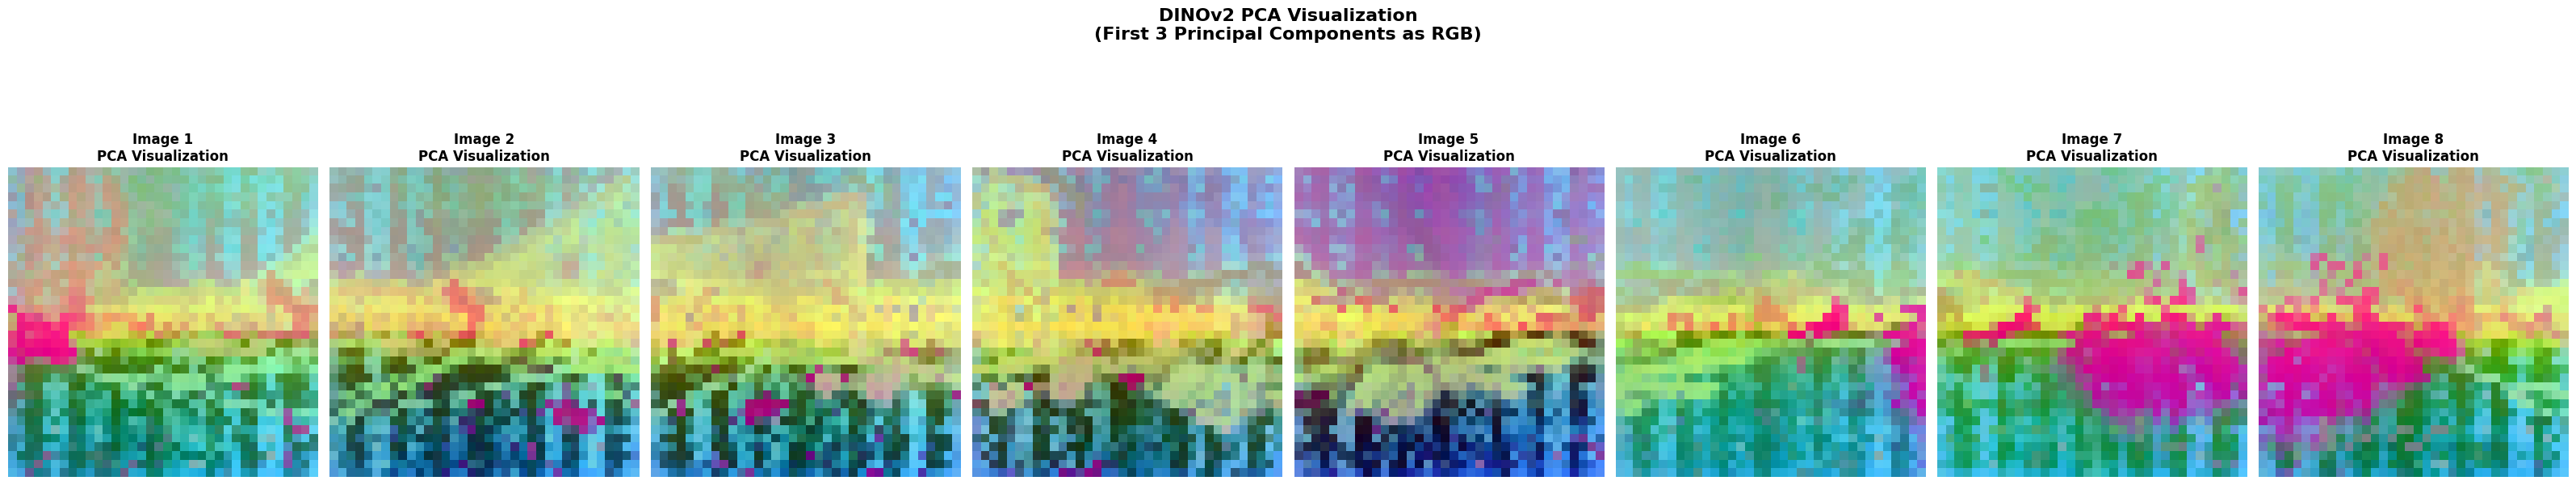


=== PCA 분석 결과 ===
주성분 1 설명 분산: 15.93%
주성분 2 설명 분산: 9.46%
주성분 3 설명 분산: 8.30%
총 설명 분산: 33.69%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def dinov2_multiple_pca_visualization(hidden_states_list, remove_cls_token=True, use_background_removal=True):
    """
    여러 이미지의 DINOv2 hidden states에서 공통 PCA 기반 RGB 시각화 생성
    
    Args:
        hidden_states_list (list): Hidden states 리스트 
                                  각 원소는 [seq_len, hidden_dim] 또는 [batch_size, seq_len, hidden_dim]
        remove_cls_token (bool): CLS 토큰 제거 여부
        use_background_removal (bool): 배경 제거 적용 여부
        
    Returns:
        list: RGB 시각화 이미지들의 리스트 [patch_h, patch_w, 3]
    """
    
    # 1. 모든 hidden states 전처리
    all_patch_tokens = []
    processed_tokens_list = []
    
    for hidden_states in hidden_states_list:
        # 배치 차원 처리
        if hidden_states.ndim == 3:
            hidden_states = hidden_states[0]
        
        # CLS 토큰 제거
        if remove_cls_token:
            patch_tokens = hidden_states[1:]
        else:
            patch_tokens = hidden_states
        
        processed_tokens_list.append(patch_tokens)
        all_patch_tokens.append(patch_tokens)
    
    # 2. 모든 패치 토큰 결합 (공통 PCA를 위해)
    combined_tokens = np.vstack(all_patch_tokens)
    
    # 3. 배경 제거 (선택적)
    if use_background_removal:
        # 1차 PCA로 배경/전경 분리
        pca_bg = PCA(n_components=1)
        bg_component = pca_bg.fit_transform(combined_tokens)
        
        # 경험적 임계값으로 전경 마스크 생성
        foreground_mask = bg_component.flatten() > 0.6
        
        if np.sum(foreground_mask) > 0:
            foreground_tokens = combined_tokens[foreground_mask]
        else:
            foreground_tokens = combined_tokens
    else:
        foreground_tokens = combined_tokens
    
    # 4. 공통 PCA 모델 학습 (첫 3개 성분)
    pca_semantic = PCA(n_components=3)
    pca_semantic.fit(foreground_tokens)
    
    # 5. 각 이미지별로 PCA 변환 및 RGB 시각화 생성
    pca_rgb_list = []
    
    for patch_tokens in processed_tokens_list:
        # 공통 PCA 모델로 변환
        semantic_features = pca_semantic.transform(patch_tokens)
        
        # RGB 정규화 [0, 1]
        rgb_features = np.zeros_like(semantic_features)
        for i in range(3):
            component = semantic_features[:, i]
            min_val, max_val = component.min(), component.max()
            if max_val != min_val:
                rgb_features[:, i] = (component - min_val) / (max_val - min_val)
            else:
                rgb_features[:, i] = 0.5
        
        # 패치 격자로 재구성
        num_patches = len(patch_tokens)
        patch_size = int(np.sqrt(num_patches))
        
        pca_rgb = rgb_features.reshape(patch_size, patch_size, 3)
        pca_rgb_list.append(pca_rgb)
    
    return pca_rgb_list, pca_semantic

def visualize_multiple_pca_results(hidden_states_list, titles=None, save_path=None, figsize=None):
    """
    여러 이미지의 PCA 결과를 동시에 시각화 (DINOv2 논문 Figure 1 스타일)
    
    Args:
        hidden_states_list (list): Hidden states 리스트
        titles (list, optional): 각 이미지의 제목
        save_path (str, optional): 저장 경로
        figsize (tuple, optional): 그림 크기
        
    Returns:
        tuple: (pca_rgb_list, pca_model)
    """
    
    num_images = len(hidden_states_list)
    
    # 기본 설정
    if titles is None:
        titles = [f'Image {i+1}' for i in range(num_images)]
    
    if figsize is None:
        figsize = (4 * num_images, 8)
    
    # PCA 수행
    pca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)
    
    # 시각화
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    
    # 단일 이미지인 경우 axes를 리스트로 변환
    if num_images == 1:
        axes = [axes]
    
    for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
        axes[i].imshow(pca_rgb)
        axes[i].set_title(f'{title}\nPCA Visualization', fontsize=12, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('DINOv2 PCA Visualization\n(First 3 Principal Components as RGB)', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"시각화 저장: {save_path}")
    
    plt.show()
    
    # PCA 분석 정보 출력
    explained_variance = pca_model.explained_variance_ratio_
    print(f"\n=== PCA 분석 결과 ===")
    print(f"주성분 1 설명 분산: {explained_variance[0]:.2%}")
    print(f"주성분 2 설명 분산: {explained_variance[1]:.2%}")
    print(f"주성분 3 설명 분산: {explained_variance[2]:.2%}")
    print(f"총 설명 분산: {np.sum(explained_variance):.2%}")
    
    return pca_rgb_list, pca_model

def compare_images_pca(hidden_states_list, original_images=None, titles=None, save_path=None):
    """
    원본 이미지와 PCA 시각화를 함께 비교 표시
    
    Args:
        hidden_states_list (list): Hidden states 리스트
        original_images (list, optional): 원본 이미지들 (PIL Image 또는 numpy array)
        titles (list, optional): 각 이미지의 제목
        save_path (str, optional): 저장 경로
    """
    
    num_images = len(hidden_states_list)
    
    if titles is None:
        titles = [f'Image {i+1}' for i in range(num_images)]
    
    # PCA 수행
    pca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)
    
    # 원본 이미지가 있는 경우 2행으로, 없는 경우 1행으로 구성
    if original_images is not None:
        fig, axes = plt.subplots(2, num_images, figsize=(4 * num_images, 8))
        
        # 단일 이미지인 경우 처리
        if num_images == 1:
            axes = axes.reshape(2, 1)
        
        # 원본 이미지 표시
        for i, (orig_img, title) in enumerate(zip(original_images, titles)):
            axes[0, i].imshow(orig_img)
            axes[0, i].set_title(f'{title}\nOriginal', fontsize=12)
            axes[0, i].axis('off')
        
        # PCA 시각화 표시
        for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
            axes[1, i].imshow(pca_rgb)
            axes[1, i].set_title(f'{title}\nPCA Visualization', fontsize=12)
            axes[1, i].axis('off')
    
    else:
        # PCA 시각화만 표시
        fig, axes = plt.subplots(1, num_images, figsize=(4 * num_images, 4))
        
        if num_images == 1:
            axes = [axes]
        
        for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
            axes[i].imshow(pca_rgb)
            axes[i].set_title(f'{title}\nPCA Visualization', fontsize=12, fontweight='bold')
            axes[i].axis('off')
    
    plt.suptitle('blip2 Semantic Feature Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"비교 시각화 저장: {save_path}")
    
    plt.show()
    
    return pca_rgb_list, pca_model

# 예제 1: 기본 여러 이미지 PCA 시각화

hidden_states_list = last_hidden_states
pca_results, pca_model = visualize_multiple_pca_results(
    hidden_states_list, 
)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def calculate_patch_correspondence(hidden_states_1, hidden_states_2, overlap_ratio=0.5, 
                                remove_cls_token=True, similarity_metric='cosine'):
    """
    두 이미지의 겹치는 영역에서 패치별 특징 정합성을 계산
    
    Args:
        hidden_states_1, hidden_states_2: 두 이미지의 hidden states [seq_len, hidden_dim]
        overlap_ratio (float): 겹치는 비율 (예: 0.5 = 50%)
        remove_cls_token (bool): CLS 토큰 제거 여부
        similarity_metric (str): 유사도 메트릭 ('cosine', 'euclidean', 'dot_product')
        
    Returns:
        dict: 정합성 분석 결과
    """
    
    # 전처리
    def preprocess_hidden_states(hidden_states):
        if hidden_states.ndim == 3:
            hidden_states = hidden_states[0]
        if remove_cls_token:
            return hidden_states[1:]
        return hidden_states
    
    patches_1 = preprocess_hidden_states(hidden_states_1)
    patches_2 = preprocess_hidden_states(hidden_states_2)
    
    # 패치 격자 크기 계산
    num_patches = len(patches_1)
    patch_size = int(np.sqrt(num_patches))
    
    # 겹치는 영역 정의 (중앙 기준으로 overlap_ratio만큼)
    overlap_patches = int(patch_size * overlap_ratio)
    start_idx = (patch_size - overlap_patches) // 2
    end_idx = start_idx + overlap_patches
    
    # 겹치는 영역의 패치 인덱스 추출
    overlap_indices = []
    for i in range(start_idx, end_idx):
        for j in range(start_idx, end_idx):
            patch_idx = i * patch_size + j
            overlap_indices.append(patch_idx)
    
    # 겹치는 영역의 특징 추출
    overlap_features_1 = patches_1[overlap_indices]
    overlap_features_2 = patches_2[overlap_indices]
    
    # 유사도 계산
    if similarity_metric == 'cosine':
        # 각 패치별 코사인 유사도
        similarities = []
        for f1, f2 in zip(overlap_features_1, overlap_features_2):
            sim = cosine_similarity([f1], [f2])[0, 0]
            similarities.append(sim)
        similarities = np.array(similarities)
        
    elif similarity_metric == 'euclidean':
        # 유클리드 거리 (작을수록 유사)
        distances = np.linalg.norm(overlap_features_1 - overlap_features_2, axis=1)
        # 거리를 유사도로 변환 (0~1 범위)
        max_dist = np.max(distances)
        similarities = 1 - (distances / max_dist) if max_dist > 0 else np.ones_like(distances)
        
    elif similarity_metric == 'dot_product':
        # 내적 유사도 (정규화된)
        norm_f1 = overlap_features_1 / np.linalg.norm(overlap_features_1, axis=1, keepdims=True)
        norm_f2 = overlap_features_2 / np.linalg.norm(overlap_features_2, axis=1, keepdims=True)
        similarities = np.sum(norm_f1 * norm_f2, axis=1)
    
    # 통계 계산
    mean_similarity = np.mean(similarities)
    std_similarity = np.std(similarities)
    min_similarity = np.min(similarities)
    max_similarity = np.max(similarities)
    
    # 공간적 정합성 맵 생성
    similarity_map = similarities.reshape(overlap_patches, overlap_patches)
    
    results = {
        'similarities': similarities,
        'similarity_map': similarity_map,
        'mean_similarity': mean_similarity,
        'std_similarity': std_similarity,
        'min_similarity': min_similarity,
        'max_similarity': max_similarity,
        'overlap_ratio': overlap_ratio,
        'num_overlap_patches': len(overlap_indices),
        'overlap_indices': overlap_indices,
        'metric': similarity_metric
    }
    
    return results

def visualize_correspondence_analysis(correspondence_results, title_prefix=""):
    """
    특징 정합성 분석 결과를 시각화
    
    Args:
        correspondence_results (dict): calculate_patch_correspondence 결과
        title_prefix (str): 제목 접두사
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # 1. 유사도 히스토그램
    axes[0, 0].hist(correspondence_results['similarities'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(correspondence_results['mean_similarity'], color='red', linestyle='--', 
                      label=f'평균: {correspondence_results["mean_similarity"]:.3f}')
    axes[0, 0].set_xlabel('유사도')
    axes[0, 0].set_ylabel('빈도')
    axes[0, 0].set_title('패치별 특징 유사도 분포')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. 공간적 유사도 맵
    im = axes[0, 1].imshow(correspondence_results['similarity_map'], cmap='viridis', vmin=0, vmax=1)
    axes[0, 1].set_title('공간적 특징 정합성 맵')
    axes[0, 1].set_xlabel('패치 열 인덱스')
    axes[0, 1].set_ylabel('패치 행 인덱스')
    plt.colorbar(im, ax=axes[0, 1], label='유사도')
    
    # 3. 박스 플롯
    axes[1, 0].boxplot(correspondence_results['similarities'], vert=True)
    axes[1, 0].set_ylabel('유사도')
    axes[1, 0].set_title('특징 유사도 분포 (박스플롯)')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. 통계 정보 텍스트
    stats_text = f"""
정합성 분석 통계
─────────────────
평균 유사도: {correspondence_results['mean_similarity']:.4f}
표준편차: {correspondence_results['std_similarity']:.4f}
최소값: {correspondence_results['min_similarity']:.4f}
최대값: {correspondence_results['max_similarity']:.4f}

겹침 비율: {correspondence_results['overlap_ratio']*100:.1f}%
분석 패치 수: {correspondence_results['num_overlap_patches']}개
유사도 메트릭: {correspondence_results['metric']}
    """
    
    axes[1, 1].text(0.1, 0.5, stats_text, transform=axes[1, 1].transAxes, 
                    fontsize=11, verticalalignment='center', fontfamily='monospace')
    axes[1, 1].axis('off')
    
    plt.suptitle(f'{title_prefix}특징 정합성 분석 결과', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return fig

def multi_image_correspondence_analysis(hidden_states_list, overlap_ratio=0.5, 
                                      similarity_metric='cosine', titles=None):
    """
    여러 이미지 쌍에 대한 특징 정합성 분석
    
    Args:
        hidden_states_list (list): Hidden states 리스트
        overlap_ratio (float): 겹침 비율
        similarity_metric (str): 유사도 메트릭
        titles (list): 이미지 제목들
        
    Returns:
        dict: 모든 쌍의 정합성 분석 결과
    """
    
    n_images = len(hidden_states_list)
    
    if titles is None:
        titles = [f'Image_{i+1}' for i in range(n_images)]
    
    # 모든 쌍에 대한 분석
    pairwise_results = {}
    similarity_matrix = np.zeros((n_images, n_images))
    
    for i in range(n_images):
        for j in range(i+1, n_images):
            pair_key = f"{titles[i]}_vs_{titles[j]}"
            
            # 정합성 계산
            result = calculate_patch_correspondence(
                hidden_states_list[i], hidden_states_list[j],
                overlap_ratio=overlap_ratio,
                similarity_metric=similarity_metric
            )
            
            pairwise_results[pair_key] = result
            
            # 대칭 행렬 채우기
            mean_sim = result['mean_similarity']
            similarity_matrix[i, j] = mean_sim
            similarity_matrix[j, i] = mean_sim
    
    # 대각선 채우기 (자기 자신과의 유사도 = 1)
    np.fill_diagonal(similarity_matrix, 1.0)
    
    # 전체 결과 시각화
    plt.figure(figsize=(10, 8))
    
    # 유사도 행렬 히트맵
    plt.subplot(2, 1, 1)
    sns.heatmap(similarity_matrix, annot=True, cmap='viridis', 
                xticklabels=titles, yticklabels=titles,
                vmin=0, vmax=1, fmt='.3f')
    plt.title('이미지 쌍별 평균 특징 정합성 행렬')
    
    # 쌍별 유사도 분포
    plt.subplot(2, 1, 2)
    all_similarities = []
    pair_labels = []
    
    for pair_key, result in pairwise_results.items():
        all_similarities.extend(result['similarities'])
        pair_labels.extend([pair_key] * len(result['similarities']))
    
    # 박스플롯으로 쌍별 분포 비교
    unique_pairs = list(pairwise_results.keys())
    pair_data = [pairwise_results[pair]['similarities'] for pair in unique_pairs]
    
    plt.boxplot(pair_data, labels=unique_pairs)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('유사도')
    plt.title('이미지 쌍별 특징 유사도 분포')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 종합 통계
    overall_stats = {
        'pairwise_results': pairwise_results,
        'similarity_matrix': similarity_matrix,
        'mean_pairwise_similarity': np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]),
        'std_pairwise_similarity': np.std(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]),
        'titles': titles,
        'overlap_ratio': overlap_ratio,
        'similarity_metric': similarity_metric
    }
    
    return overall_stats

# 사용 예제
def analyze_feature_correspondence(hidden_states_list, overlap_ratio=0.5, titles=None):
    """
    편리한 래퍼 함수: 특징 정합성 종합 분석
    """
    
    print("=== 특징 정합성 분석 시작 ===\n")
    
    # 다중 이미지 분석
    results = multi_image_correspondence_analysis(
        hidden_states_list, 
        overlap_ratio=overlap_ratio,
        titles=titles
    )
    
    print(f"전체 평균 정합성: {results['mean_pairwise_similarity']:.4f}")
    print(f"정합성 표준편차: {results['std_pairwise_similarity']:.4f}")
    print(f"분석된 겹침 비율: {overlap_ratio*100:.1f}%")
    
    # 개별 쌍 분석 (첫 번째 쌍 예시)
    if len(results['pairwise_results']) > 0:
        first_pair = list(results['pairwise_results'].keys())[0]
        first_result = results['pairwise_results'][first_pair]
        
        print(f"\n=== 세부 분석 예시: {first_pair} ===")
        visualize_correspondence_analysis(first_result, title_prefix=f"{first_pair} - ")
    
    return results

=== 특징 정합성 분석 시작 ===



IndexError: list index out of range